# Stock Market Analysis
# Data Visualization project

Creator : Aadya Rawat

## Import Packages

In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import DataReader
from datetime import datetime
import __future__

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [9]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-19,1121.890015,1110.000000,1110.000000,1118.560059,1046400,1118.560059
2019-02-20,1123.410034,1105.280029,1119.989990,1113.800049,1087800,1113.800049
2019-02-21,1111.939941,1092.520020,1110.839966,1096.969971,1415100,1096.969971
2019-02-22,1111.239990,1095.599976,1100.900024,1110.369995,1049500,1110.369995
2019-02-25,1118.540039,1107.270020,1116.000000,1109.400024,1413100,1109.400024


In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,229.283426,225.430797,227.136653,227.595100,2.772576e+07,226.116972
std,44.030261,43.449703,43.670828,43.953923,9.761159e+06,44.512032
min,171.440002,169.490005,169.710007,170.929993,1.136200e+07,168.721588
25%,199.379997,195.250000,196.934998,197.524994,2.091505e+07,195.723831
50%,210.449997,207.199997,208.759995,208.839996,2.604360e+07,206.935638
75%,262.985001,260.539993,261.100006,261.869995,3.201080e+07,261.249969
max,327.850006,323.350006,324.739990,327.200012,6.928140e+07,327.200012


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-02-19 to 2020-02-14
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


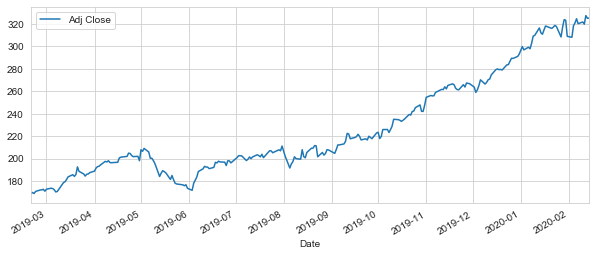

In [25]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

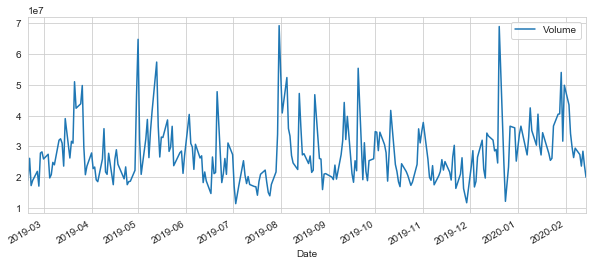

In [27]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [40]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

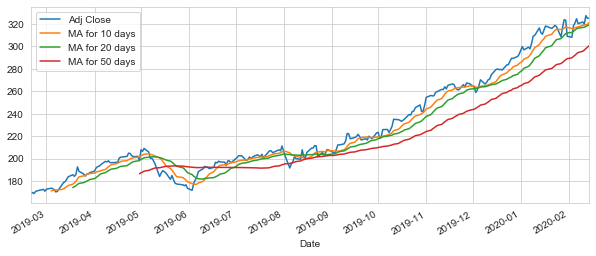

In [36]:
AAPL[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

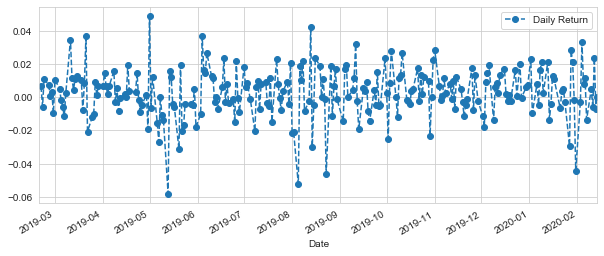

In [41]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

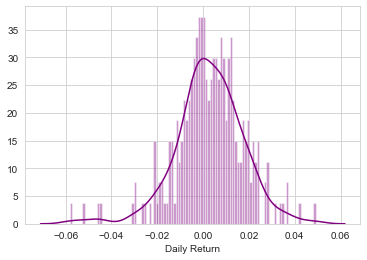

In [44]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

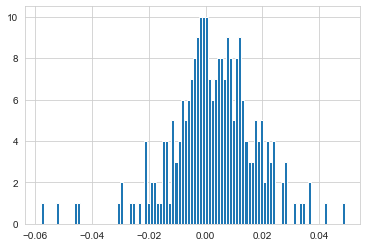

In [45]:
AAPL['Daily Return'].hist(bins=100)

In [47]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [48]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-02-19,168.721588,1627.579956,1118.560059,106.593895
2019-02-20,169.807388,1622.099976,1113.800049,106.039703
2019-02-21,168.849930,1619.439941,1096.969971,108.276283
2019-02-22,170.735229,1631.560059,1110.369995,109.820114
2019-02-25,171.978958,1633.000000,1109.400024,110.433685


In [50]:
tech_rets= closing_df.pct_change()

In [51]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-02-19,NaN,NaN,NaN,NaN
2019-02-20,0.006435,-0.003367,-0.004255,-0.005199
2019-02-21,-0.005638,-0.001640,-0.015111,0.021092
2019-02-22,0.011166,0.007484,0.012215,0.014258
2019-02-25,0.007285,0.000883,-0.000874,0.005587


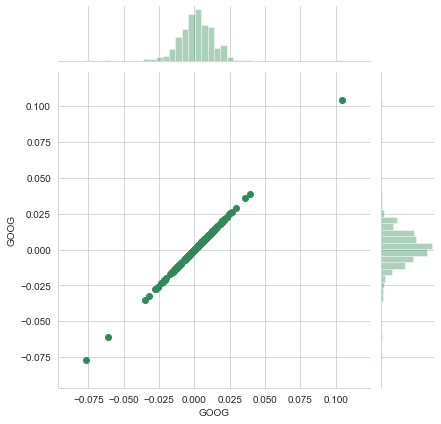

In [53]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

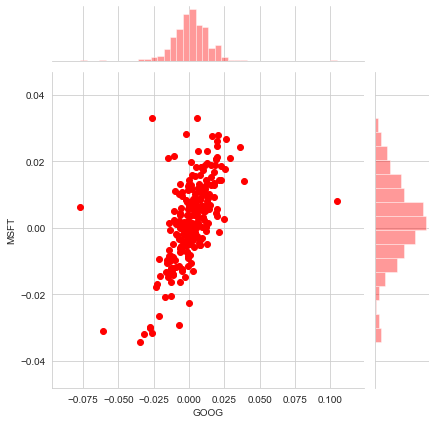

In [54]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='red')

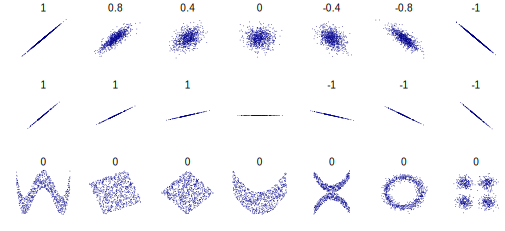

In [58]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [60]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-02-19,NaN,NaN,NaN,NaN
2019-02-20,0.006435,-0.003367,-0.004255,-0.005199
2019-02-21,-0.005638,-0.001640,-0.015111,0.021092
2019-02-22,0.011166,0.007484,0.012215,0.014258
2019-02-25,0.007285,0.000883,-0.000874,0.005587


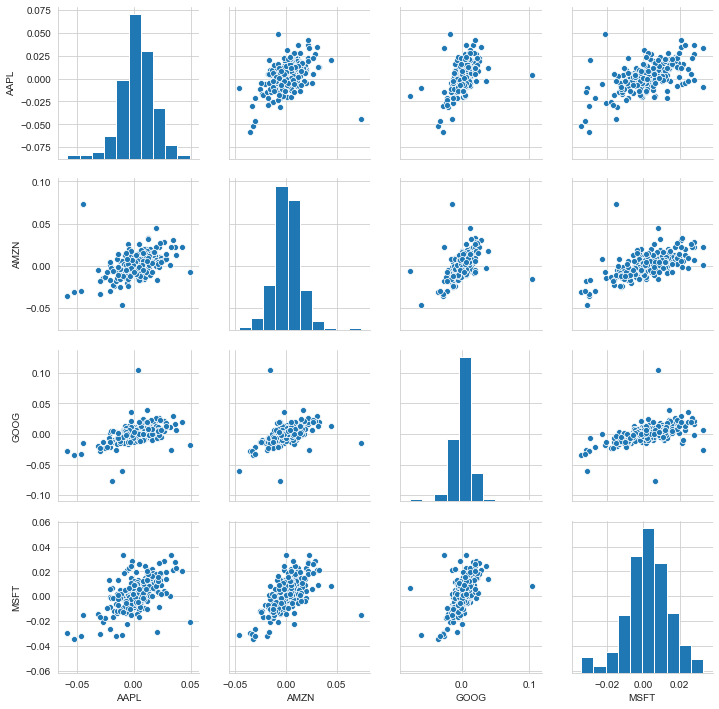

In [61]:
sns.pairplot(tech_rets.dropna())

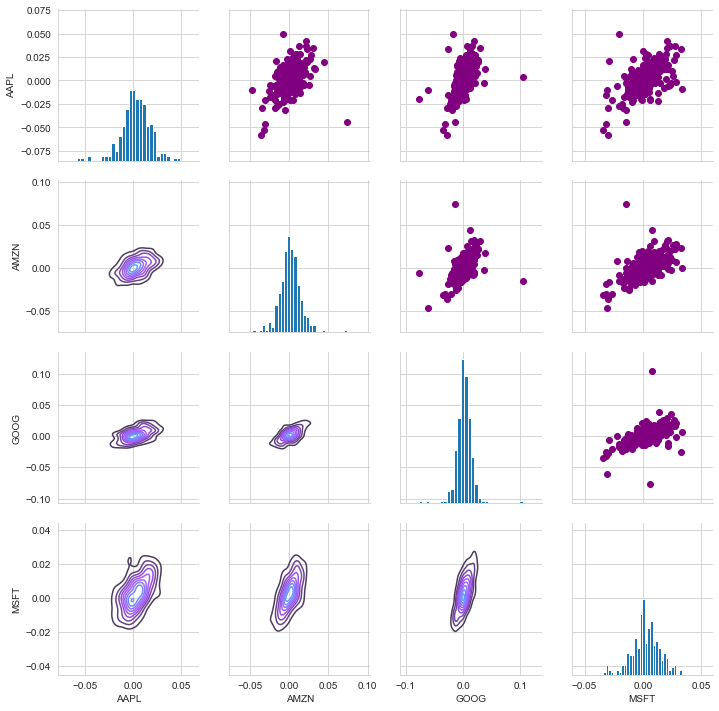

In [62]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

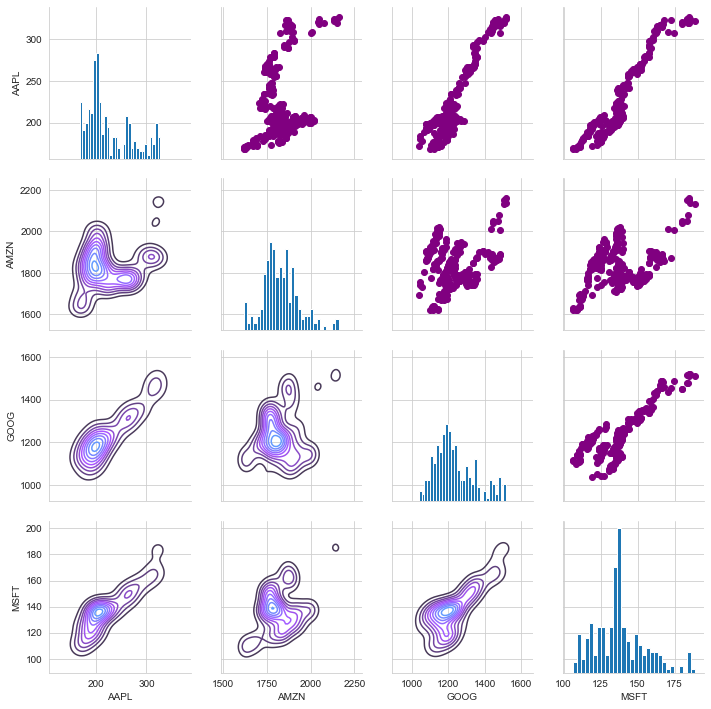

In [63]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

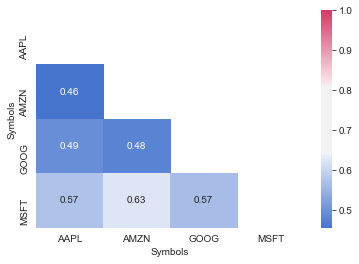

In [71]:
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True, mask=mask)

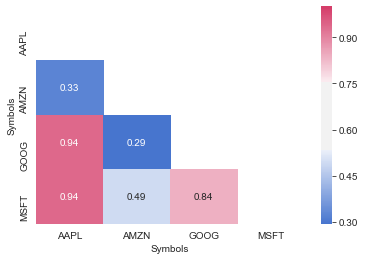

In [87]:
corr = closing_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True, mask=mask)

# Risk analysis

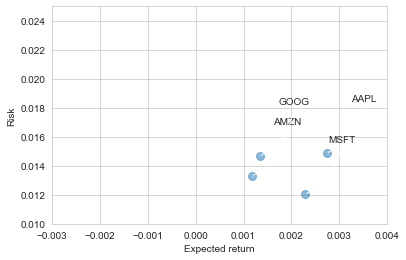

In [86]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area,alpha=0.5)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords = 'offset points' ,ha='right',va='bottom',
        arrowprops = dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

### Value at risk

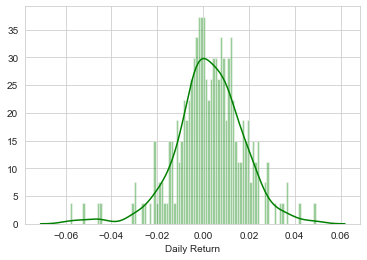

In [92]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

In [93]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-02-20,0.006435,-0.003367,-0.004255,-0.005199
2019-02-21,-0.005638,-0.001640,-0.015111,0.021092
2019-02-22,0.011166,0.007484,0.012215,0.014258
2019-02-25,0.007285,0.000883,-0.000874,0.005587
2019-02-26,0.000574,0.002082,0.005165,0.006900


In [98]:
rets['AAPL'].quantile(0.05)

-0.02066582741846719

In [100]:
rets['MSFT'].quantile(0.05)

-0.016542569823248122

In [101]:
rets['GOOG'].quantile(0.05)

-0.01882072815761808

In [102]:
rets['AMZN'].quantile(0.05)

-0.01761897164523867

### Value at risk using Monte-Carlo

In [110]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price

In [111]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-19,1121.890015,1110.000000,1110.000000,1118.560059,1046400,1118.560059
2019-02-20,1123.410034,1105.280029,1119.989990,1113.800049,1087800,1113.800049
2019-02-21,1111.939941,1092.520020,1110.839966,1096.969971,1415100,1096.969971
2019-02-22,1111.239990,1095.599976,1100.900024,1110.369995,1049500,1110.369995
2019-02-25,1118.540039,1107.270020,1116.000000,1109.400024,1413100,1109.400024


Text(0.5, 1.0, 'Monte carlo analysis for google')

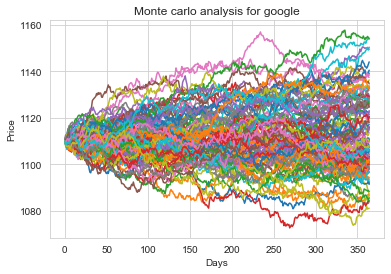

In [113]:
start_price = 1110

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analysis for google')

In [127]:
runs = 98
simulations = np.zeros(run)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution of GOOGLE after 365 days')

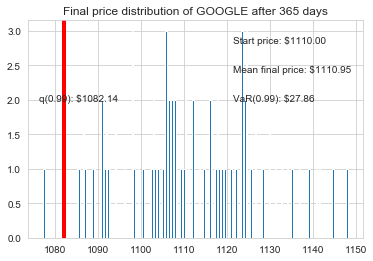

In [128]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8, s = 'Start price: $%.2f' %start_price)
plt.figtext(0.6,0.7, s = 'Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6,0.6, s = 'VaR(0.99): $%.2f' %(start_price-q,))
plt.figtext(0.15,0.6, s = 'q(0.99): $%.2f' %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title("Final price distribution of GOOGLE after %s days" %days)